<a href="https://colab.research.google.com/github/Marwenboughanmi/EVS-project-1/blob/main/percent_EVs_vs_Oil_Cunsumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install the required libraries
!pip install prophet

In [ ]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Import files that we'll be using
from google.colab import files
ev_data_file = files.upload()
oil_consumption_file = files.upload()

Saving share-car-stocks-electric.csv to share-car-stocks-electric.csv


Saving energy-consumption-by-source-and-country.csv to energy-consumption-by-source-and-country.csv


# Find the Top Five and Bottom Five Countries with the Highest Percentages of Electric Vehicles

In [56]:
# Create a data frame from the ev data
ev_df = pd.read_csv("share-car-stocks-electric.csv")
ev_df = ev_df.set_index('Year')
ev_df=ev_df.rename(columns={'Share of car stocks that are electric':'% of Cars that are EVs', 'Entity': 'Country'})
del ev_df['Code']

# Remove entities that are not countries
ev_df = ev_df[ev_df['Country'] != 'Rest of World']
ev_df = ev_df[ev_df['Country'] != 'World']

# Display the ev dataframe
display(ev_df.head())
display(ev_df.tail())

,Country,% of Cars that are EVs
Year,,
2011,Australia,0.00039
2012,Australia,0.00240
2013,Australia,0.00460
2014,Australia,0.01400
2015,Australia,0.02700


,Country,% of Cars that are EVs
Year,,
2019,United States,0.62
2020,United States,0.77
2021,United States,0.95
2022,United States,1.30
2023,United States,2.10


In [ ]:
#find the countires with the highest percentage of EVs in the most recent available year
ev_data_2023 = ev_df.loc[ev_df.index == 2023]
ev_data_2023 = ev_data_2023.sort_values(by=['% of Cars that are EVs'], ascending=False)
display(ev_data_2023.head())
display(ev_data_2023.tail())

,Country,% of Cars that are EVs
Year,,
2023,Norway,29.0
2023,Iceland,18.0
2023,Denmark,11.0
2023,Sweden,11.0
2023,Netherlands,8.3


,Country,% of Cars that are EVs
Year,,
2023,India,0.310
2023,Brazil,0.210
2023,Mexico,0.140
2023,Chile,0.087
2023,South Africa,0.044


['Norway', 'Iceland', 'Denmark', 'Sweden', 'Netherlands']


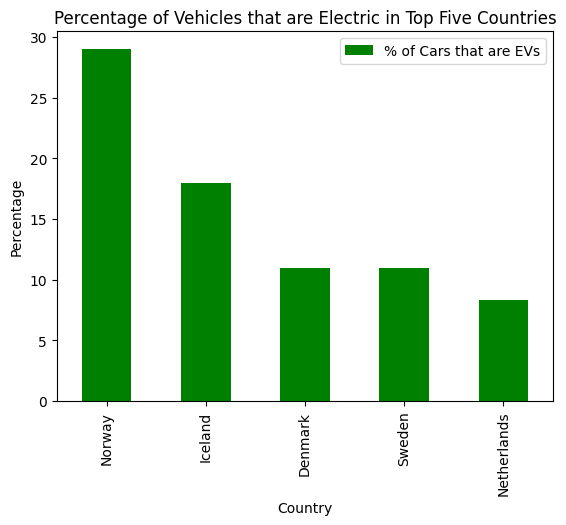

In [ ]:
# Create a list and a bar graph of the top 5 Countries
top_5_countries = ev_data_2023.head()
top_5_country_list = top_5_countries['Country'].tolist()

print(top_5_country_list)

top_5_countries.plot(kind='bar',
                     x='Country', y='% of Cars that are EVs',
                     title='Percentage of Vehicles that are Electric in Top Five Countries',
                     ylabel='Percentage',
                     color ='g')
plt.show()

['India', 'Brazil', 'Mexico', 'Chile', 'South Africa']


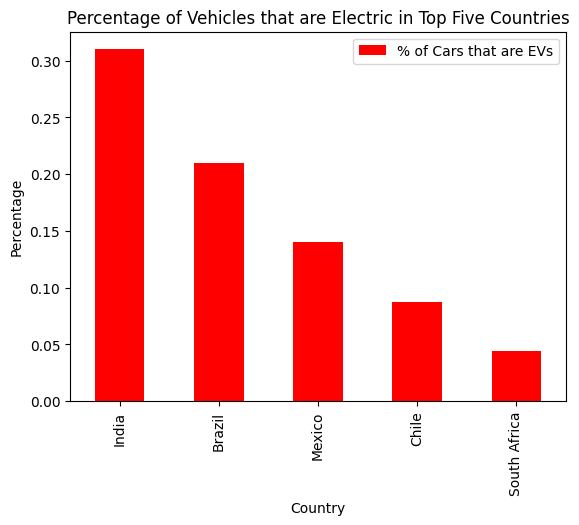

In [ ]:
# Create a list and a bar graph of the bottom 5 Countries
bottom_5_countries = ev_data_2023.tail()
bottom_5_country_list = bottom_5_countries['Country'].tolist()

print(bottom_5_country_list)

bottom_5_countries.plot(kind='bar',
                     x='Country', y='% of Cars that are EVs',
                     title='Percentage of Vehicles that are Electric in Top Five Countries',
                     ylabel='Percentage',
                     color ='r')
plt.show()

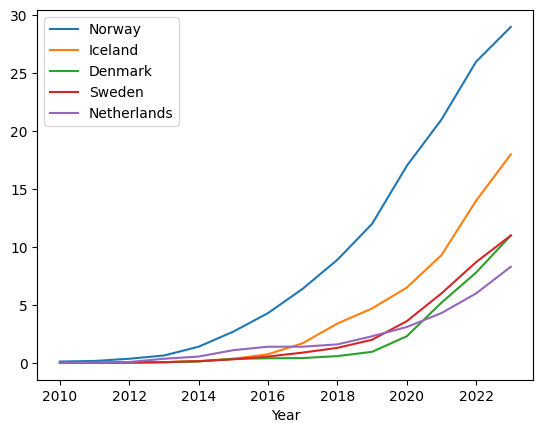

In [ ]:
#plotting the top 5 countries with the highest percentage of EV's
fig, ax = plt.subplots()

ev_df.loc[ev_df['Country']=='Norway']['% of Cars that are EVs'].plot(ax=ax, label="Norway")
ev_df.loc[ev_df['Country']=='Iceland']['% of Cars that are EVs'].plot(ax=ax, label='Iceland')
ev_df.loc[ev_df['Country']=='Denmark']['% of Cars that are EVs'].plot(ax=ax, label='Denmark')
ev_df.loc[ev_df['Country']=='Sweden']['% of Cars that are EVs'].plot(ax=ax, label='Sweden')
ev_df.loc[ev_df['Country']=='Netherlands']['% of Cars that are EVs'].plot(ax=ax, label='Netherlands')

#ev_df.loc[ev_df['Country']=='United States'].plot(ax=ax, label='United States')
plt.legend(loc='best')
plt.show()

# Merge Motor Gasoline Data With EV Data

In [ ]:
# Create a data frame for the oil consumption data
oil_con_df = pd.read_csv("energy-consumption-by-source-and-country.csv")
oil_con_df = oil_con_df.set_index('Year')
oil_con_df=oil_con_df.rename(columns={'Entity': 'Country'})

#isolate oil column
oil_con_df = oil_con_df[['Country','Oil consumption - TWh']]

# Set up data in oil_con_df to match ev_df
display(oil_con_df.head())
display(oil_con_df.tail())


,Country,Oil consumption - TWh
Year,,
1971,Africa,474.30540
1972,Africa,510.72960
1973,Africa,549.80396
1974,Africa,569.73850
1975,Africa,597.67100


,Country,Oil consumption - TWh
Year,,
2019,Zimbabwe,NaN
2020,Zimbabwe,NaN
2021,Zimbabwe,NaN
2022,Zimbabwe,NaN
2023,Zimbabwe,NaN


In [ ]:
# merge the dfs
merged_df = pd.merge(ev_df, oil_con_df, on=['Country', 'Year'], how='outer')
merged_df = merged_df.dropna()

#display the merged df
display(merged_df.head())
display(merged_df.tail())

,Country,% of Cars that are EVs,Oil consumption - TWh
Year,,,
2011,Australia,0.00039,547.06030
2012,Australia,0.00240,561.41907
2013,Australia,0.00460,578.03705
2014,Australia,0.01400,575.42820
2015,Australia,0.02700,570.29706


,Country,% of Cars that are EVs,Oil consumption - TWh
Year,,,
2019,United States,0.62,10287.683
2020,United States,0.77,9035.320
2021,United States,0.95,9868.985
2022,United States,1.30,9930.587
2023,United States,2.10,9960.662


# Look For Trends Between Oil Consumption and Percentage of Vehicles that are Electric

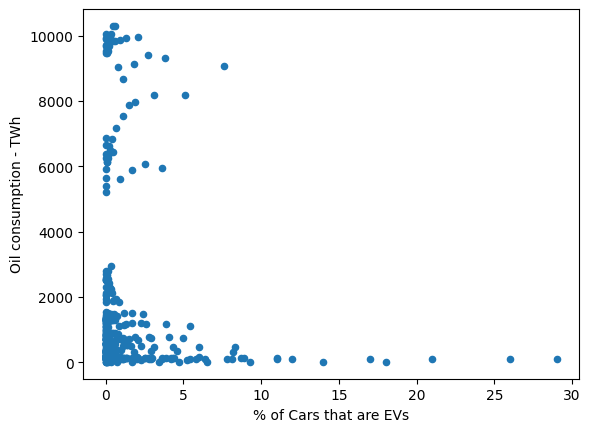

In [ ]:
fig, ax = plt.subplots()

merged_df.plot(kind='scatter', ax=ax, x='% of Cars that are EVs', y='Oil consumption - TWh')
plt.show()

plt.show()

In [ ]:
merged_df[['% of Cars that are EVs','Oil consumption - TWh']].corr()

,% of Cars that are EVs,Oil consumption - TWh
% of Cars that are EVs,1.00000,-0.07579
Oil consumption - TWh,-0.07579,1.00000


plot for top top 5 and bottom 5 countries by % of ev's

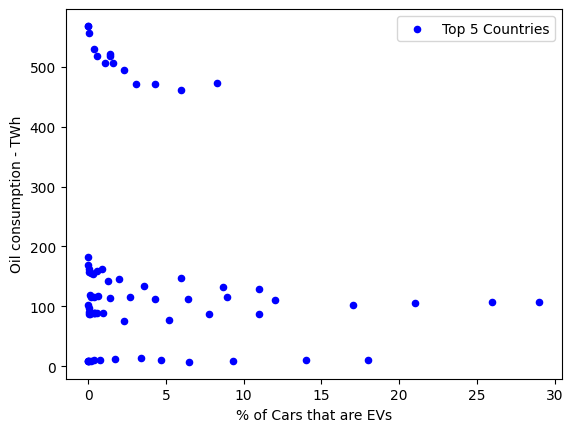

In [ ]:
fig, ax = plt.subplots()

# Filter the DataFrame to include only the top 5 countries by '% of Cars that are EVs'
filter_df = merged_df[merged_df['Country'].isin(top_5_country_list)]

# Plot the filtered top 5 countries
filter_df.plot(kind='scatter', ax=ax, x='% of Cars that are EVs', y='Oil consumption - TWh', color='blue', label='Top 5 Countries')
plt.show()

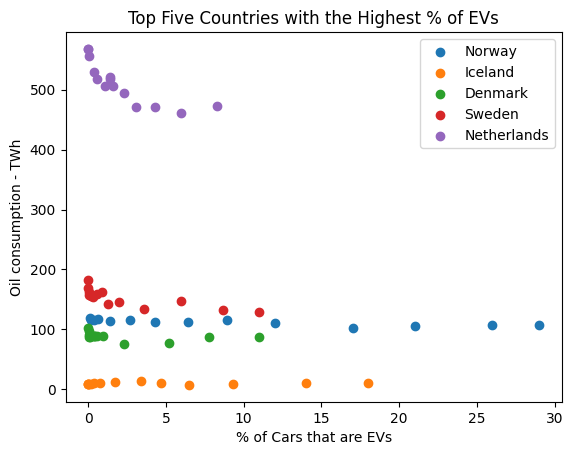

In [99]:
fig, ax = plt.subplots()

norway = merged_df.loc[merged_df['Country']=='Norway']['% of Cars that are EVs']
iceland = merged_df.loc[merged_df['Country']=='Iceland']['% of Cars that are EVs']
denmark = merged_df.loc[merged_df['Country']=='Denmark']['% of Cars that are EVs']
sweden = merged_df.loc[merged_df['Country']=='Sweden']['% of Cars that are EVs']
netherlands = merged_df.loc[merged_df['Country']=='Netherlands']['% of Cars that are EVs']

plt.scatter(norway, merged_df.loc[merged_df['Country']=='Norway']['Oil consumption - TWh'], label = 'Norway')
plt.scatter(iceland, merged_df.loc[merged_df['Country']=='Iceland']['Oil consumption - TWh'], label = 'Iceland')
plt.scatter(denmark, merged_df.loc[merged_df['Country']=='Denmark']['Oil consumption - TWh'], label ='Denmark')
plt.scatter(sweden, merged_df.loc[merged_df['Country']=='Sweden']['Oil consumption - TWh'], label = 'Sweden')
plt.scatter(netherlands, merged_df.loc[merged_df['Country']=='Netherlands']['Oil consumption - TWh'], label = 'Netherlands')

plt.legend(loc='best')
plt.xlabel('% of Cars that are EVs')
plt.ylabel('Oil consumption - TWh')
plt.title('Top Five Countries with the Highest % of EVs')
plt.show()

In [ ]:
filter_df.head(10)

,Country,% of Cars that are EVs,Oil consumption - TWh
Year,,,
2010,Denmark,0.0037,101.928290
2011,Denmark,0.0230,97.148980
2012,Denmark,0.0560,89.821655
2013,Denmark,0.0680,87.707780
2014,Denmark,0.1300,87.400290
2015,Denmark,0.3500,88.928200
2016,Denmark,0.4000,89.055590
2017,Denmark,0.4200,88.506580
2018,Denmark,0.5900,89.400990


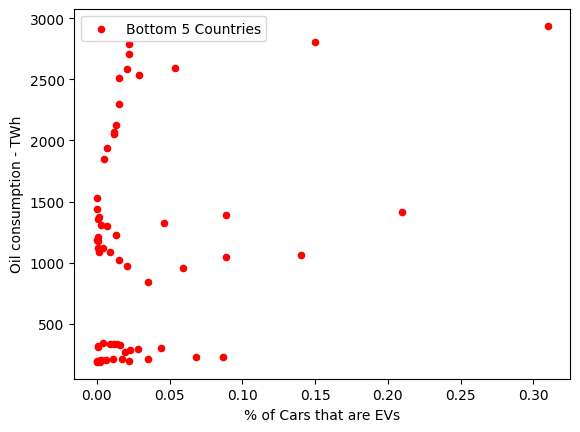

In [47]:
fig, ax = plt.subplots()
filter2_df = merged_df[merged_df['Country'].isin(bottom_5_country_list)]

# Plot the bottom 5 countries
filter2_df.plot(kind='scatter', ax=ax, x='% of Cars that are EVs', y='Oil consumption - TWh', color='red', label='Bottom 5 Countries')

plt.show()

In [100]:
print(bottom_5_country_list)

['India', 'Brazil', 'Mexico', 'Chile', 'South Africa']


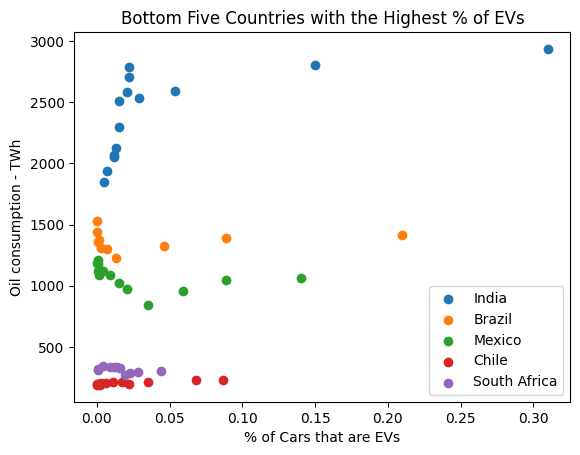

In [101]:
fig, ax = plt.subplots()

india = merged_df.loc[merged_df['Country']=='India']['% of Cars that are EVs']
brazil = merged_df.loc[merged_df['Country']=='Brazil']['% of Cars that are EVs']
mexico = merged_df.loc[merged_df['Country']=='Mexico']['% of Cars that are EVs']
chile = merged_df.loc[merged_df['Country']=='Chile']['% of Cars that are EVs']
south_africa = merged_df.loc[merged_df['Country']=='South Africa']['% of Cars that are EVs']

plt.scatter(india, merged_df.loc[merged_df['Country']=='India']['Oil consumption - TWh'], label = 'India')
plt.scatter(brazil, merged_df.loc[merged_df['Country']=='Brazil']['Oil consumption - TWh'], label = 'Brazil')
plt.scatter(mexico, merged_df.loc[merged_df['Country']=='Mexico']['Oil consumption - TWh'], label ='Mexico')
plt.scatter(chile, merged_df.loc[merged_df['Country']=='Chile']['Oil consumption - TWh'], label = 'Chile')
plt.scatter(south_africa, merged_df.loc[merged_df['Country']=='South Africa']['Oil consumption - TWh'], label = 'South Africa')

plt.legend(loc='best')
plt.xlabel('% of Cars that are EVs')
plt.ylabel('Oil consumption - TWh')
plt.title('Bottom Five Countries with the Highest % of EVs')
plt.show()

In [ ]:
ev_df.head()

,Country,% of Cars that are EVs
Year,,
2011,Australia,0.00039
2012,Australia,0.00240
2013,Australia,0.00460
2014,Australia,0.01400
2015,Australia,0.02700


## Forcasting to predict EV global development

In [58]:
ev_df

,Country,% of Cars that are EVs
Year,,
2011,Australia,0.00039
2012,Australia,0.00240
2013,Australia,0.00460
2014,Australia,0.01400
2015,Australia,0.02700
...,...,...
2019,United States,0.62000
2020,United States,0.77000
2021,United States,0.95000


In [80]:
# Forcast the future of the ev datafram
ev_new = ev_df.reset_index(drop = False)
ev_new.head()

,0
Year,int64
Country,object
% of Cars that are EVs,float64


In [81]:
del ev_new['Country']
ev_new['Year'] = pd.to_datetime(ev_new['Year'], format='%Y')
ev_new.head()

,Year,% of Cars that are EVs
0,2011-01-01,0.00039
1,2012-01-01,0.00240
2,2013-01-01,0.00460
3,2014-01-01,0.01400
4,2015-01-01,0.02700


In [82]:
ev_new.columns = ['ds', 'y']
ev_new

,ds,y
0,2011-01-01,0.00039
1,2012-01-01,0.00240
2,2013-01-01,0.00460
3,2014-01-01,0.01400
4,2015-01-01,0.02700
...,...,...
433,2019-01-01,0.62000
434,2020-01-01,0.77000
435,2021-01-01,0.95000
436,2022-01-01,1.30000


In [83]:
# Creates Prophet model
model = Prophet()

model.fit(ev_new)

# Forecast future 5 years
future = model.make_future_dataframe(periods=5, freq='Y')

forecast = model.predict(future)
forecast.tail()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4488p8ja/9uwxr86r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4488p8ja/i0kqbgnw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26234', 'data', 'file=/tmp/tmp4488p8ja/9uwxr86r.json', 'init=/tmp/tmp4488p8ja/i0kqbgnw.json', 'output', 'file=/tmp/tmp4488p8ja/prophet_modelbn432smj/prophet_model-20241001232818.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:28:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:28:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
14,2023-12-31,5.205233,1.737988,8.553255,5.182231,5.224902,-0.238554,-0.238554,-0.238554,-0.238554,-0.238554,-0.238554,0.0,0.0,0.0,4.966680
15,2024-12-31,5.964539,2.461951,8.910331,5.895925,6.026334,-0.264930,-0.264930,-0.264930,-0.264930,-0.264930,-0.264930,0.0,0.0,0.0,5.699609
16,2025-12-31,6.721770,3.176954,9.930098,6.596042,6.847740,-0.256266,-0.256266,-0.256266,-0.256266,-0.256266,-0.256266,0.0,0.0,0.0,6.465504
17,2026-12-31,7.479001,3.580979,10.703194,7.281223,7.673115,-0.247470,-0.247470,-0.247470,-0.247470,-0.247470,-0.247470,0.0,0.0,0.0,7.231531
18,2027-12-31,8.236232,4.518875,11.251526,7.958297,8.507717,-0.238554,-0.238554,-0.238554,-0.238554,-0.238554,-0.238554,0.0,0.0,0.0,7.997679


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


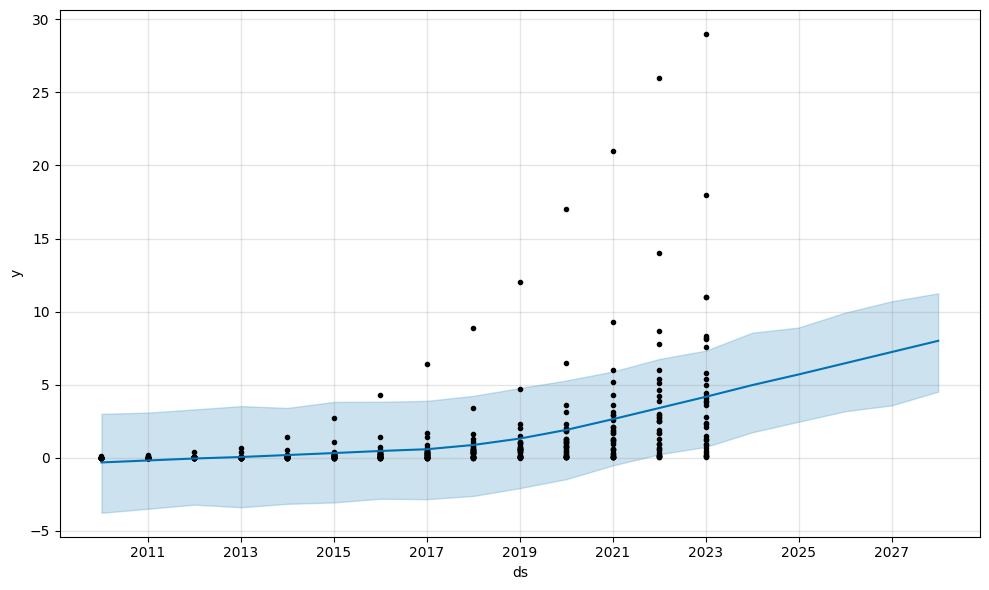

In [86]:
# Plots the forecast
fig = model.plot(forecast)
fig.show()

## Forcasting of Gas Consumption globally

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4488p8ja/k9fc7w9n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4488p8ja/6jwtg71i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56256', 'data', 'file=/tmp/tmp4488p8ja/k9fc7w9n.json', 'init=/tmp/tmp4488p8ja/6jwtg71i.json', 'output', 'file=/tmp/tmp4488p8ja/prophet_modelc3j38a5z/prophet_model-20241001212516.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:25:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:25:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/

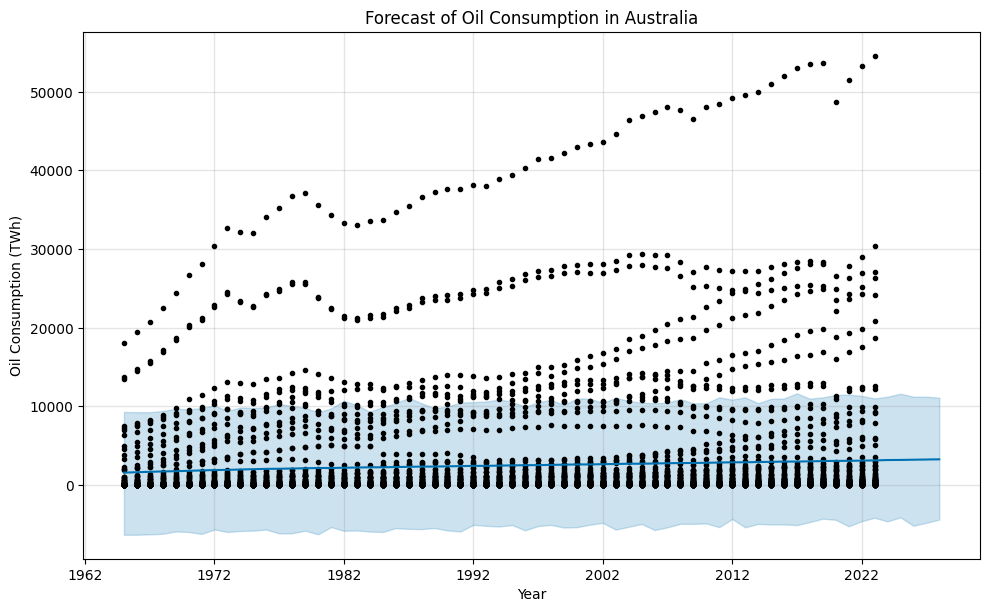

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

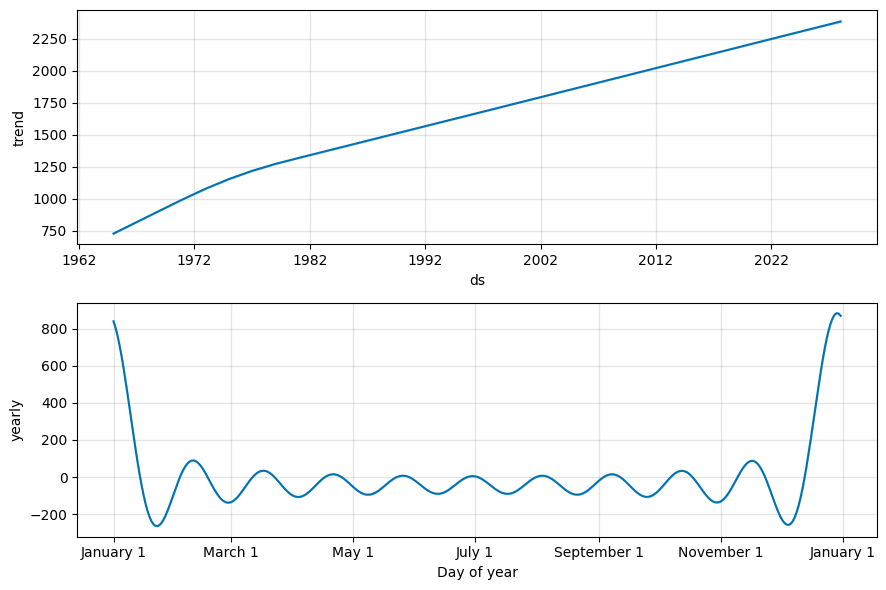

In [ ]:

# Reset index and rename columns for Prophet
oil_con_df = oil_con_df.reset_index()
oil_con_df = oil_con_df[['Year', 'Oil consumption - TWh']].rename(columns={'Year': 'ds', 'Oil consumption - TWh': 'y'})

# Convert 'ds' (Year) column to datetime format
oil_con_df['ds'] = pd.to_datetime(oil_con_df['ds'], format='%Y')

# Initialize Prophet model
model = Prophet()

# Fit the model with the data
model.fit(oil_con_df)

# Create a future DataFrame for the next 5 years
future = model.make_future_dataframe(periods=5, freq='Y')

# Make predictions
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.title('Forecast of Oil Consumption in Australia')
plt.xlabel('Year')
plt.ylabel('Oil Consumption (TWh)')
plt.show()

# Plot forecast components (trend, seasonality)
model.plot_components(forecast)
plt.show()